In [216]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2HDM with $Z_2$ symmetry

In [217]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [218]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [219]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[4.669423437237478,
  3.8700927593968935,
  4.7261789885677805,
  3.8133372080665913],
 [0.7923489882868351,
  4.62418821924784,
  2.8933779344391954,
  0.7923489882868351],
 [0.5675120513111391,
  3.4212427839296193,
  2.906315775177598,
  0.5675120513111391],
 [-0.03684206128043854,
  4.671537342250478,
  0.14219777408822187,
  -0.03684206128043854],
 [1.522364780583704,
  1.4882925796637183,
  2.190001486534177,
  0.8206558737132452],
 [3.7578470009097877,
  2.128920751657194,
  3.0756306803804856,
  2.8111370721864963],
 [2.799677054384845,
  1.3111814116529343,
  1.913863355636423,
  2.1969951104013563],
 [4.161157151822918, 2.15658121141919, 0.874654451370776, 4.161157151822918],
 [-0.208848532578787,
  4.547735206654991,
  0.635819624224464,
  -0.208848532578787],
 [3.2488121849240255,
  -1.7472057458452839,
  0.7303361011758014,
  0.7712703379029402],
 [3.800578462758203,
  -1.441350198345245,
  2.62969014565794,
  -0.27046188124498194],
 [4.356133134039249,
  -0.1346864416193

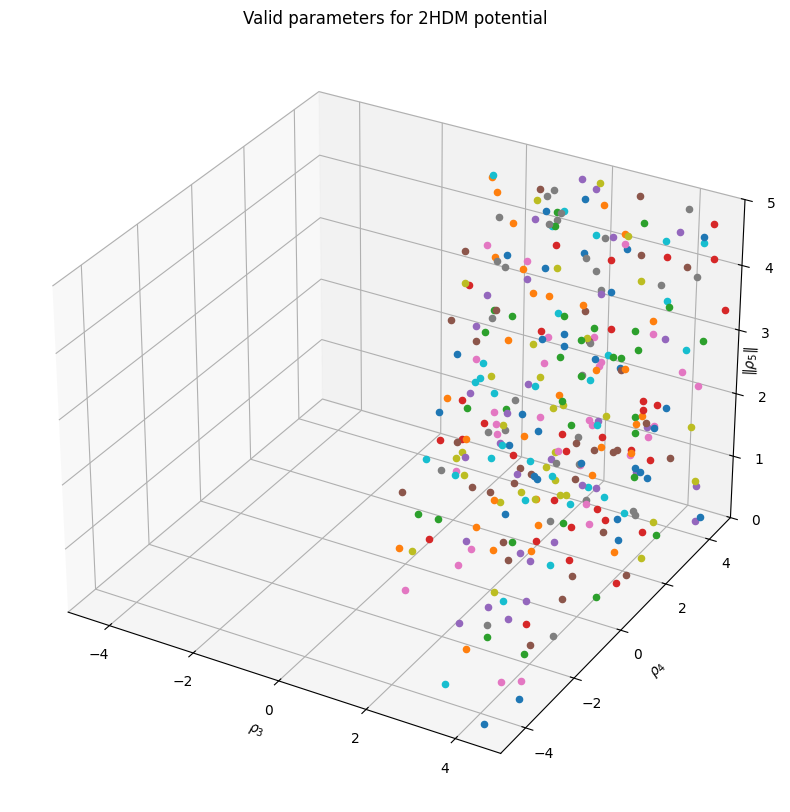

In [272]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

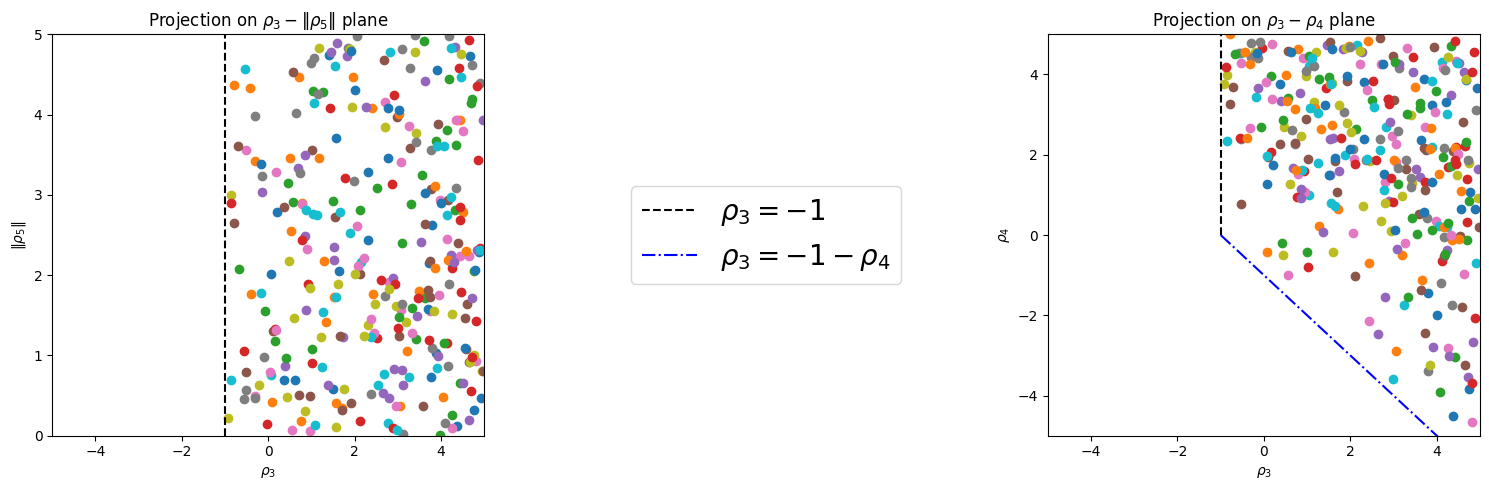

In [271]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [222]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [223]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [224]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [225]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [226]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,2*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [227]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[4.138145248057301,
  -0.4073446220886705,
  0.39590686718509904,
  3.892820011655729,
  0.7948944231662108,
  1.1125895167957582,
  0.6197232922372015,
  2.7422207630387074,
  1.774472977318374],
 [1.2658686447905119,
  4.634086673104793,
  0.5316090512976351,
  0.7035667597504544,
  0.3048295004686946,
  0.716945232302781,
  1.228115642943683,
  2.753696480549068,
  1.702646731547488],
 [4.019188067027375,
  1.3869565362427476,
  1.644739999844567,
  0.4601244234306861,
  3.589314271744734,
  4.018873590167654,
  1.6269557620013058,
  1.5870658707492484,
  1.1681673455781871],
 [-0.36939152601776026,
  4.016052414918324,
  2.1187755078384463,
  0.1906493922351822,
  2.6102211355702383,
  4.674099082965533,
  0.24487451437831265,
  1.6726765155210606,
  0.631956579032647],
 [0.20070460730355588,
  2.8890939615484434,
  0.9808873323560624,
  1.412456983398187,
  0.16885699400130072,
  5.585951536863429,
  0.4989609768879627,
  0.11119990622719197,
  1.1682117098829499],
 [1.9974623085

In [228]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [229]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [230]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [231]:
# Check!

# Reproduce Z_2-conserving 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
#
new_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),dim,10**(-5))
new_valid_values

[[1.6702404627910745,
  2.815268586856189,
  1.7429726166942183,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [0.24752012728542638,
  3.2624652346308043,
  2.292236322295007,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.248293152586279],
 [4.134886914071712,
  -3.657437035983775,
  1.2858763643184274,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.19607057364807368],
 [3.8341929335447844,
  0.413908260811092,
  2.4734711803750384,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [-0.7727168930434081,
  3.348955961113271,
  0.7333095932797079,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.22910422544661602],
 [0.3485684726808671,
  4.954044417503722,
  2.3065241266679593,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.3492376906502117],
 [3.722979277957064,
  -2.7348792331507465,
  1.364728456060983,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6275869045420841],
 [3.424988546056662,
  -1.9543898594327933,
  0.15820178928188544,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [4.811778781719733,
  -0.8833757188812408,
  1.31473240

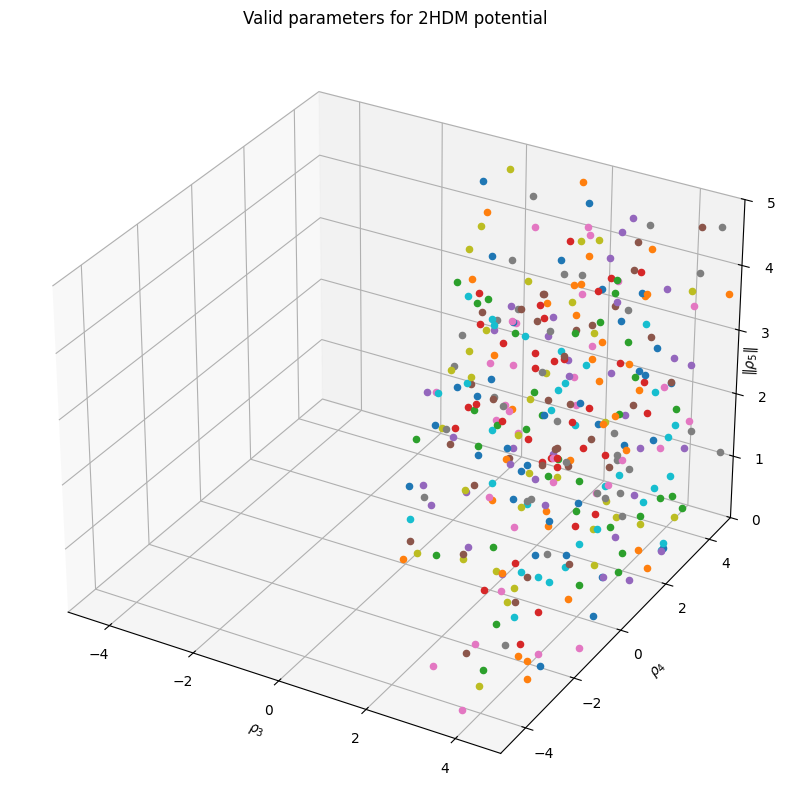

In [273]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

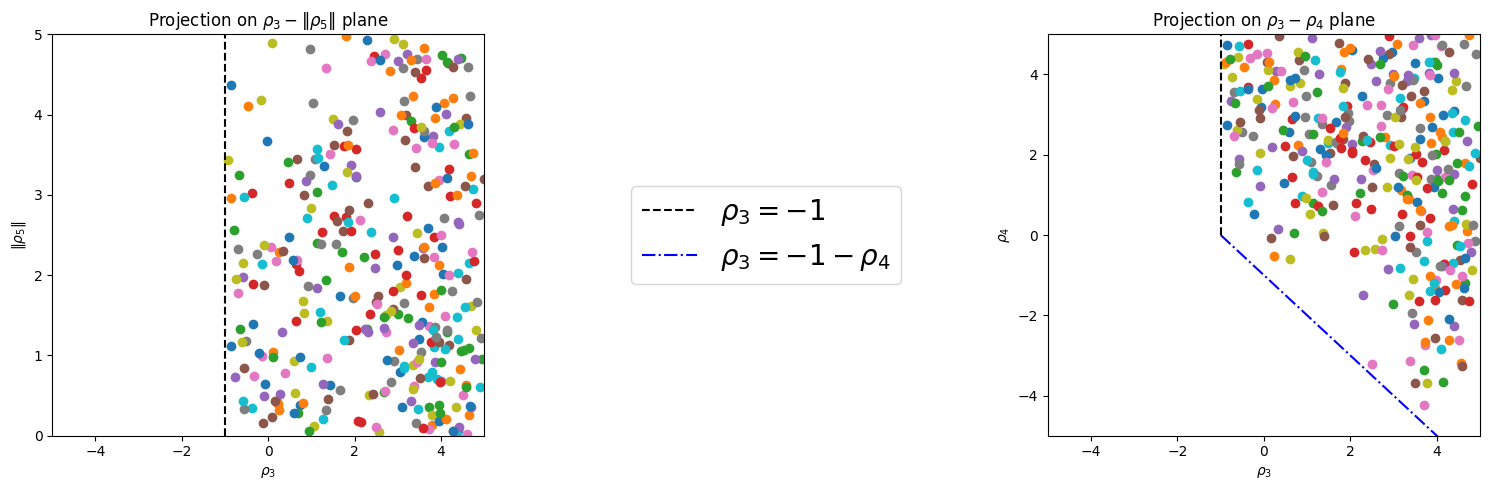

In [274]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [234]:
# Explore Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_valid_values

[[1.921130419365885,
  3.4731626038194836,
  4.927430737146291,
  5.080845735084252,
  4.459577605310095,
  5.5306684548594385,
  1.0881559159935983,
  4.574482812483714,
  0.4827589990387646],
 [4.454548574229891,
  2.90593185067996,
  4.29227579710836,
  1.701082102137764,
  2.31505459686141,
  1.7249163408717985,
  1.342044070374444,
  5.975197853845662,
  0.7704334037942422],
 [0.21543715757177395,
  0.991874689038081,
  2.78086235154991,
  5.690324097723848,
  1.3879786995247911,
  4.90464257856839,
  4.192889225720608,
  4.344028815017032,
  1.0471599994939453],
 [2.198438110875566,
  3.926936016710414,
  2.2546420187493155,
  0.7235018271871738,
  3.254227392438778,
  2.674667357590807,
  2.032889315618146,
  4.8255924423538215,
  0.12114189202970804],
 [3.709771330311284,
  4.574699527171731,
  1.7801050383927848,
  4.749080879941408,
  2.7548786247533554,
  4.578183456982181,
  2.5932536734103007,
  5.272217615054467,
  1.7482282287829642],
 [1.7650470912003913,
  4.5389509110

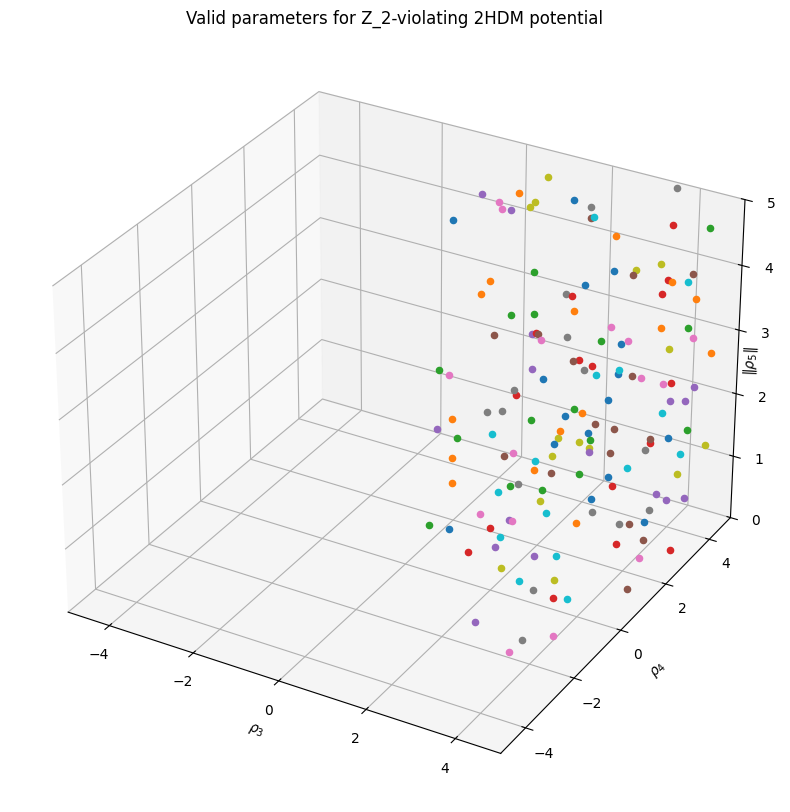

In [275]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    #
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for Z_2-violating 2HDM potential')

plt.show()

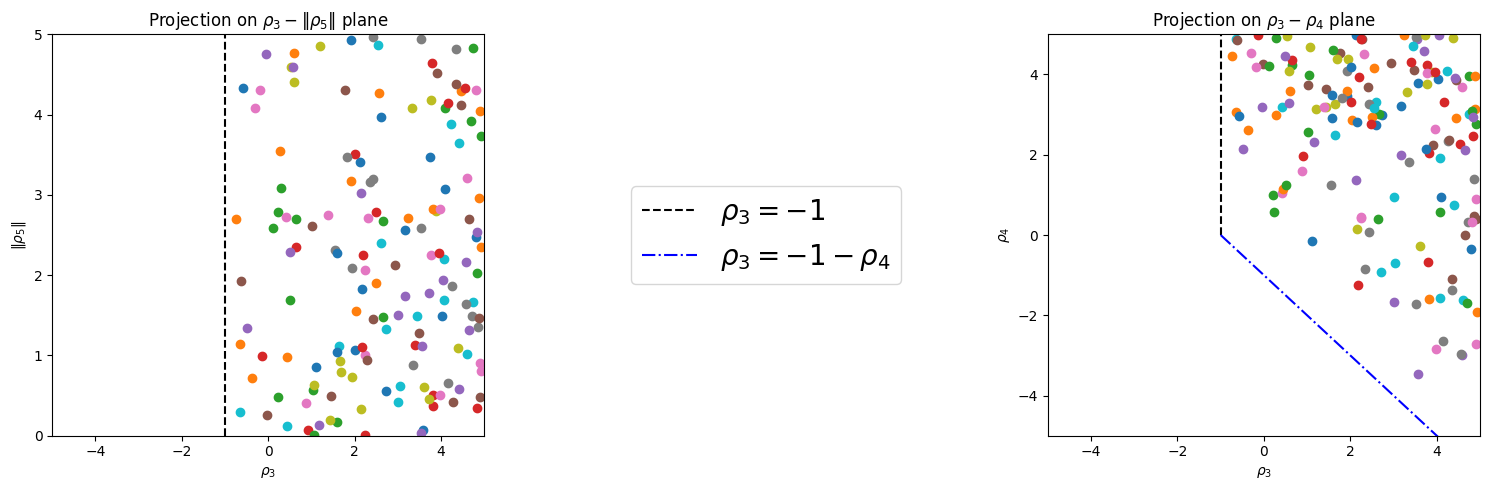

In [276]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

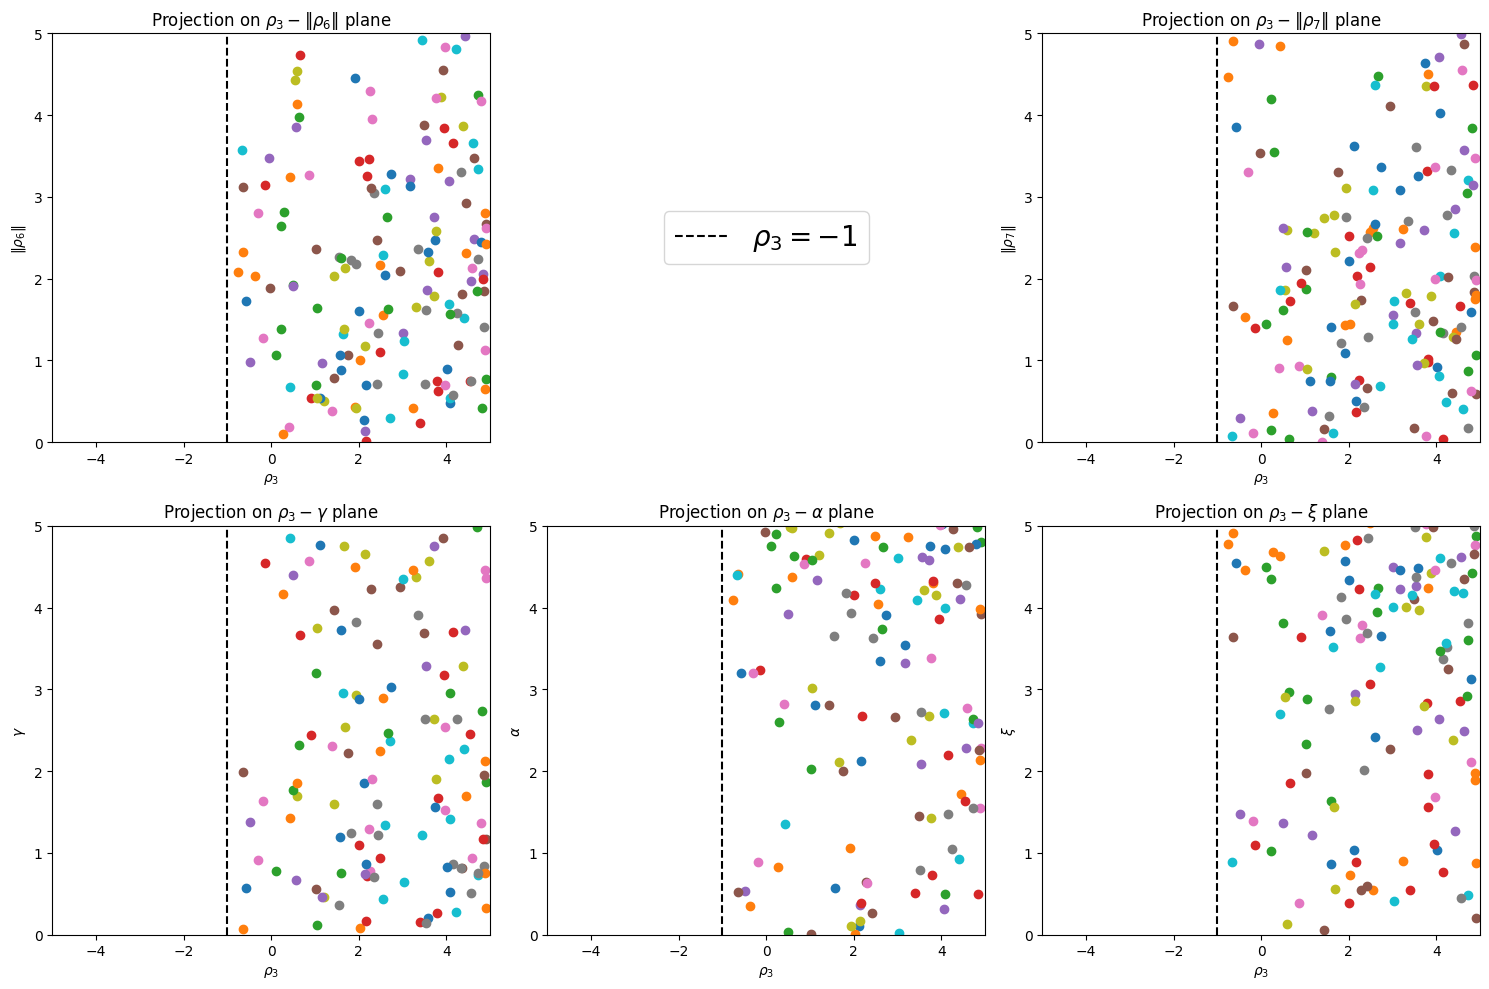

In [ ]:
# Projection on different planes

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,3,1)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][4])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{6}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{6}\|$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,3)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][6])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{7}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{7}\|$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,2)
plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')

ax = fig.add_subplot(2,3,4)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][3])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\gamma$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\gamma$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,5)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][5])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\alpha$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\alpha$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,6)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\xi$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\xi$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

plt.tight_layout()
plt.show()

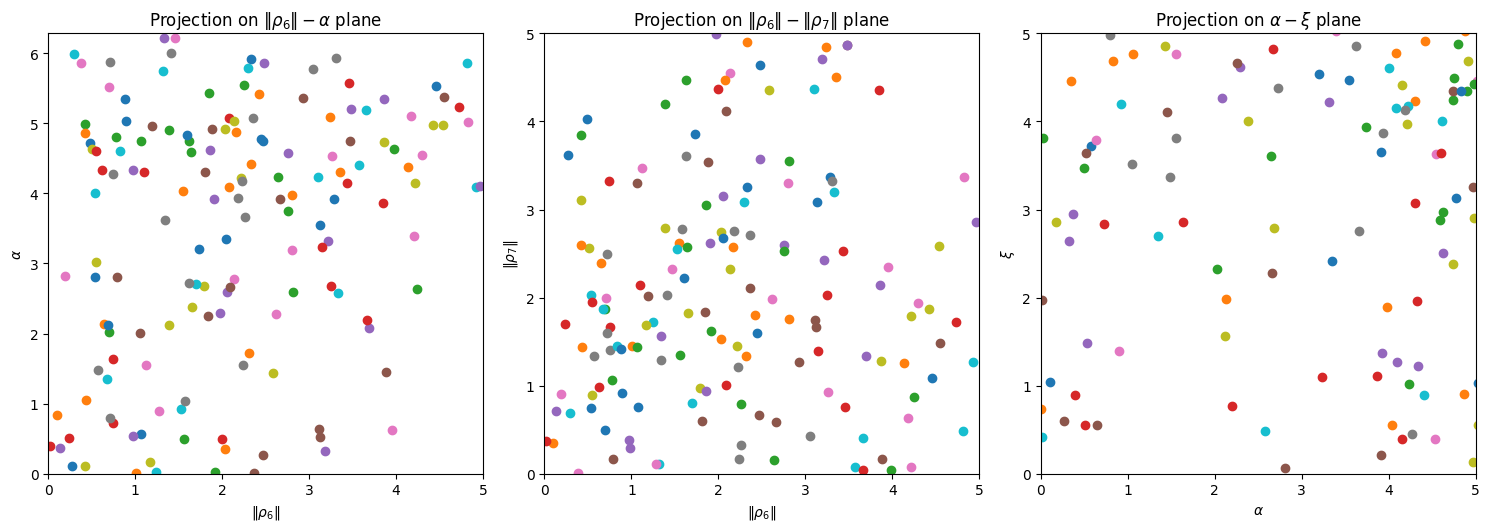

In [269]:
#More projections

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3,3,1)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][5])

ax.set_xlabel(r'$\|\rho_{6}\|$')
ax.set_ylabel(r'$\alpha$')
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_title(r'Projection on $\|\rho_{6}\|-\alpha$ plane')

ax = fig.add_subplot(3,3,2)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][6])

ax.set_xlabel(r'$\|\rho_{6}\|$')
ax.set_ylabel(r'$\|\rho_{7}\|$')
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\|\rho_{6}\|-\|\rho_{7}\|$ plane')

ax = fig.add_subplot(3,3,3)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\xi$')
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\alpha-\xi$ plane')

plt.tight_layout()  
plt.show()

In [238]:
# Explore Z_2-violating 2HDM results with rho_3<-1 (these values are impossible in the 2HDM with Z_2 symmetry)

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [239]:
# Extend the limits in order to explore Z_2-violating 2HDM results with rho_3<-1

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-10,10,dim)
rho_5 = np.random.default_rng().uniform(0,10,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,10,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,10,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.
